In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
trainData = pd.read_csv("EmployeeTrain.csv") 
trainData.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
trainData.shape

(7000, 24)

In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [5]:
trainData.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
trainData.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
#IMPUTE FILL MISSING VALUES
#for numeric data using "mean"
for val in trainData:
    #check if the column is of float type
    if trainData[val].dtypes == 'float':
        #impute with the mean value
        trainData = trainData.fillna(trainData[val].mean())

In [8]:
#For non numeric data using mode
for val in trainData:
    #check if the column is of object type
    if trainData[val].dtypes == 'object':
        #impute with the mode
        trainData = trainData.fillna(trainData[val].value_counts().index[0])

In [9]:
trainData.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder
#one hot encoding data
oheTrainData = trainData.copy()
categories = ['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits', 'Relationship_Status', 'Gender']
for column in categories:
    ohe = OneHotEncoder(sparse = False)
    new_data = ohe.fit_transform(oheTrainData[[column]])
    new_data = pd.DataFrame(new_data)
    new_data.columns = ohe.categories_[0].tolist()
    oheTrainData[new_data.columns] = new_data
    oheTrainData.drop(column, axis=1, inplace=True)
oheTrainData.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,...,Directive,type0,type1,type2,type3,type4,Married,Single,F,M
0,EID_23371,42.0,4,4.0,4,33,1,1,7.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,EID_18000,24.0,3,5.0,4,36,0,3,6.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,EID_3891,58.0,3,27.0,3,51,0,2,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,EID_17492,26.0,3,4.0,3,56,1,3,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,EID_22534,31.0,1,5.0,4,62,1,3,2.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


/var/folders/p_/qv32fg890c31qykm902wm0mh0000gn/T/ipykernel_51904/3393752860.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  trainData.hist(ax=ax, bins = 30)


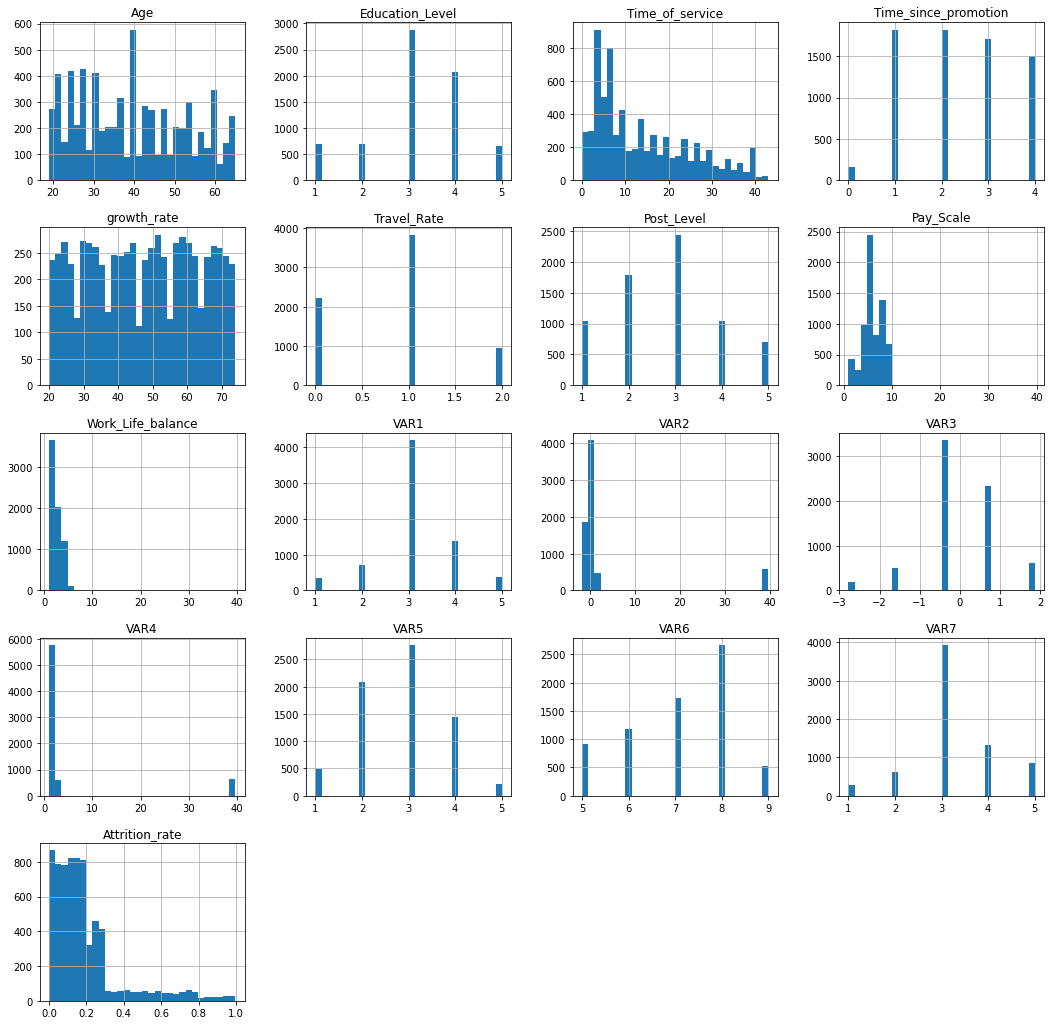

In [11]:
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
trainData.hist(ax=ax, bins = 30)
plt.show()

In [12]:
matrix = oheTrainData.corr()
print(matrix)


                                Age  Education_Level  Time_of_service  \
Age                        1.000000        -0.005599         0.838144   
Education_Level           -0.005599         1.000000        -0.010946   
Time_of_service            0.838144        -0.010946         1.000000   
Time_since_promotion       0.141393        -0.002077         0.132943   
growth_rate                0.001230         0.002991         0.001109   
Travel_Rate                0.011897        -0.017690         0.011514   
Post_Level                 0.002367         0.009986        -0.005347   
Pay_Scale                  0.006335         0.006479         0.008815   
Work_Life_balance          0.002274        -0.017492         0.009146   
VAR1                       0.005534        -0.002185         0.004763   
VAR2                      -0.003694         0.005754         0.010195   
VAR3                       0.007356        -0.009689         0.008184   
VAR4                      -0.022707         0.00744

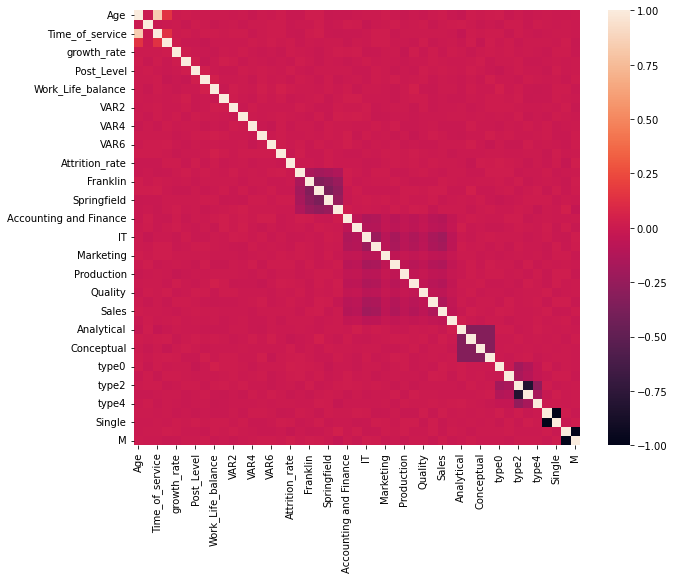

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(matrix, ax=ax)
plt.show()

In [14]:
oheTrainData.drop('Employee_ID', axis=1, inplace=True)

In [15]:
X,y = oheTrainData.loc[:,oheTrainData.columns != 'Attrition_rate'] , oheTrainData.loc[:,'Attrition_rate']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
#singleX_train = scaler.fit_transform(np.asarray(X_train['growth_rate']).reshape(-1,1))
#singleX_test = scaler.fit_transform(np.asarray(X_test['growth_rate']).reshape(-1,1))
linreg = LinearRegression()
#linreg.fit(singleX_train, y_train)
linreg.fit(rescaledX_train, y_train)

LinearRegression()

In [19]:
y_pred = linreg.predict(rescaledX_test)

In [20]:
import math
from sklearn.metrics import mean_squared_error
def RMSE(y_value, y_predicted):
    mse = mean_squared_error(y_test, y_pred)
    return math.sqrt(mse)
score = 100*max(0,1-RMSE(y_test, y_pred))
print(score)

81.0035379791067


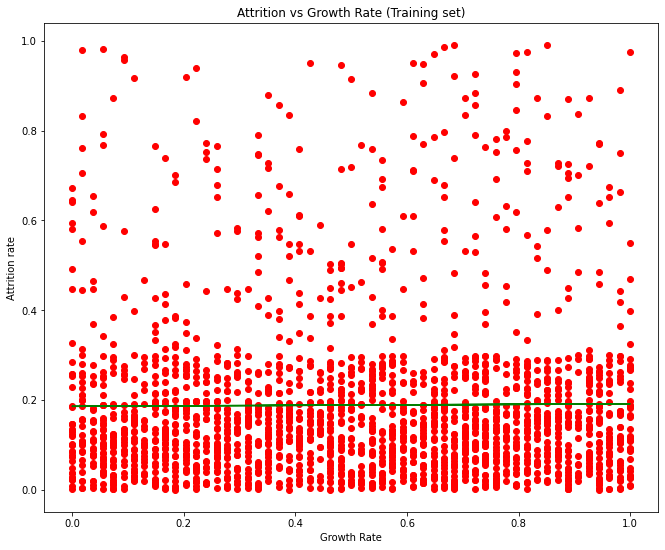

In [45]:
plt.scatter(singleX_test, y_test, color = "red")
plt.plot(singleX_train, linreg.predict(singleX_train), color = "green")
plt.title("Attrition vs Growth Rate (Training set)")
plt.xlabel("Growth Rate")
plt.ylabel("Attrition rate")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1200, random_state = 142)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)

In [22]:
score = 100*max(0,1-RMSE(y_test, y_pred))
print(score)

80.8274545495031


<AxesSubplot:title={'center':'Feature Importance'}>

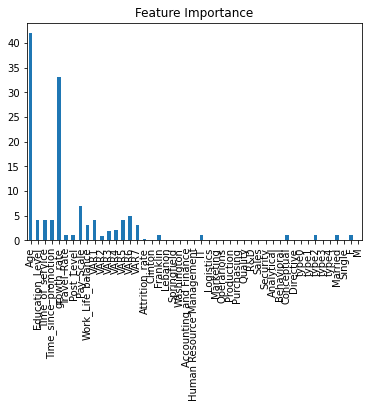

In [26]:
feature_df=pd.DataFrame(oheTrainData,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

Feature: 0, Score: 0.07940
Feature: 1, Score: 0.03855
Feature: 2, Score: 0.07236
Feature: 3, Score: 0.03137
Feature: 4, Score: 0.10220
Feature: 5, Score: 0.02191
Feature: 6, Score: 0.03838
Feature: 7, Score: 0.05902
Feature: 8, Score: 0.03455
Feature: 9, Score: 0.03448
Feature: 10, Score: 0.04438
Feature: 11, Score: 0.03534
Feature: 12, Score: 0.02639
Feature: 13, Score: 0.03506
Feature: 14, Score: 0.03995
Feature: 15, Score: 0.03583
Feature: 16, Score: 0.01050
Feature: 17, Score: 0.01086
Feature: 18, Score: 0.01148
Feature: 19, Score: 0.01133
Feature: 20, Score: 0.01003
Feature: 21, Score: 0.00702
Feature: 22, Score: 0.00866
Feature: 23, Score: 0.01008
Feature: 24, Score: 0.01024
Feature: 25, Score: 0.00597
Feature: 26, Score: 0.01059
Feature: 27, Score: 0.00753
Feature: 28, Score: 0.01039
Feature: 29, Score: 0.00492
Feature: 30, Score: 0.01235
Feature: 31, Score: 0.01246
Feature: 32, Score: 0.00547
Feature: 33, Score: 0.00978
Feature: 34, Score: 0.00842
Feature: 35, Score: 0.01129
Fe

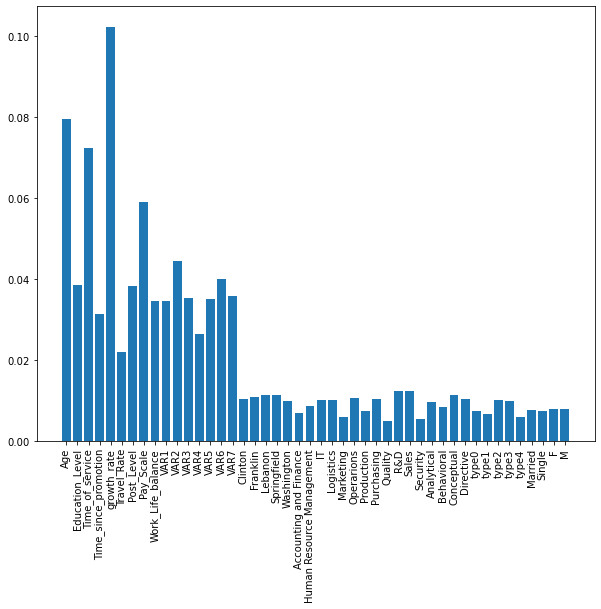

In [38]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([col for col in X_train.columns], importance)
plt.xticks(rotation = 'vertical')
plt.rcParams["figure.figsize"] = (11,9)
plt.show()